In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Definición de funciones

In [2]:
def gen_data(x0, dx, count, noise_factor):
    original_signal = np.array([x0 for i in range(count)])
    noise_signal = original_signal+noise_factor*np.random.normal(0, 1, count)
    return original_signal, noise_signal


# Simulación de sensores

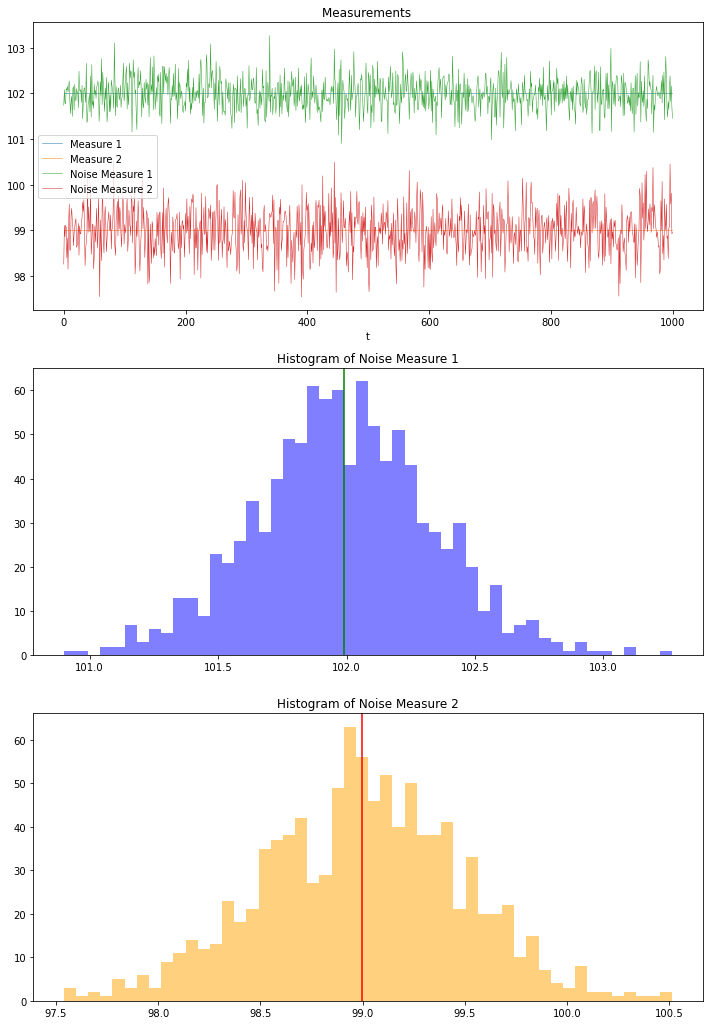

In [3]:
count = 1000

measure_1, noise_measure_1 = gen_data(x0=102, dx=0,
                                      count=count, noise_factor=0.35)
measure_2, noise_measure_2 = gen_data(x0=99, dx=0,
                                      count=count, noise_factor=0.5)


fig, axs = plt.subplots(3, 1, sharey=False, figsize=(12, 18))


axs[0].plot(measure_1,lw=0.5)
axs[0].plot(measure_2,lw=0.5)
axs[0].plot(noise_measure_1,lw=0.5)
axs[0].plot(noise_measure_2,lw=0.5)
axs[0].legend(["Measure 1", "Measure 2",
               "Noise Measure 1", "Noise Measure 2"])
axs[0].set_title("Measurements ")
axs[0].set_xlabel("t")


axs[1].set_title("Histogram of Noise Measure 1")
axs[1].axvline(x=np.mean(noise_measure_1), color='green')
axs[1].hist(noise_measure_1,bins=50, facecolor='b', alpha=0.5)


axs[2].set_title("Histogram of Noise Measure 2")
axs[2].axvline(x=np.mean(noise_measure_2), color='red')
axs[2].hist(noise_measure_2,bins=50, facecolor='orange', alpha=0.5)
plt.savefig("Graph_1_P2.png",dpi=300,bbox_inches='tight')
plt.show()


# Fusión de Sensores

## Caso 1: $w_i=\frac{1}{n}$

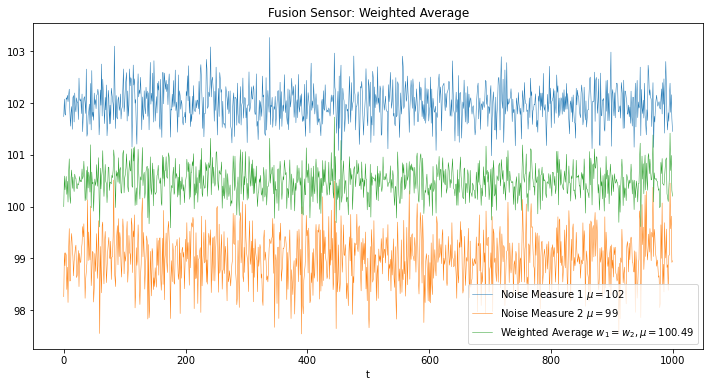

In [19]:
w = np.array([0.5, 0.5])
data = np.stack((noise_measure_1, noise_measure_2), axis=1)
x_p = np.zeros(count)
for i in range(count):
    arg = np.dot(w, data[i])
    x_p[i] = arg

plt.figure(figsize=(12, 6))

# plt.plot(measure_1,lw=0.5)
# plt.plot(measure_2,lw=0.5)

plt.plot(noise_measure_1,lw=0.5)
plt.plot(noise_measure_2,lw=0.5)
plt.plot(x_p,lw=0.5)
plt.title("Fusion Sensor: Weighted Average")
plt.xlabel("t")
plt.legend(["Noise Measure 1 $\mu = 102$", 
            "Noise Measure 2 $\mu = 99$", 
            "Weighted Average $w_1=w_2, \mu =$"+str(np.round(np.mean(x_p),2))])


plt.savefig("Graph_12_P2.png",dpi=300,bbox_inches='tight')
plt.show()

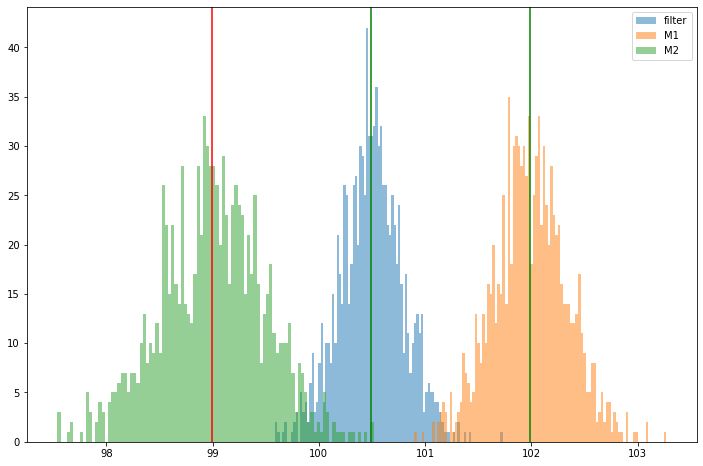

In [20]:
plt.figure(figsize=(12,8))

#axs[0].set_title("Histogram 1/2")
plt.axvline(x=np.mean(x_p), color='green')
plt.hist(x_p,bins=100, alpha=0.5, label="filter")


#axs[1].set_title("Histogram of Noise Measure 1")
plt.axvline(x=np.mean(noise_measure_1), color='green')
plt.hist(noise_measure_1,bins=100, alpha=0.5, label="M1")


#axs[2].set_title("Histogram of Noise Measure 2")
plt.axvline(x=np.mean(noise_measure_2), color='red')
plt.hist(noise_measure_2,bins=100, alpha=0.5, label="M2")

plt.legend(loc='upper right')
plt.savefig("Graph_3_P2.png",dpi=300,bbox_inches='tight')
plt.show()

## Caso 2: $w \rightarrow \sigma$

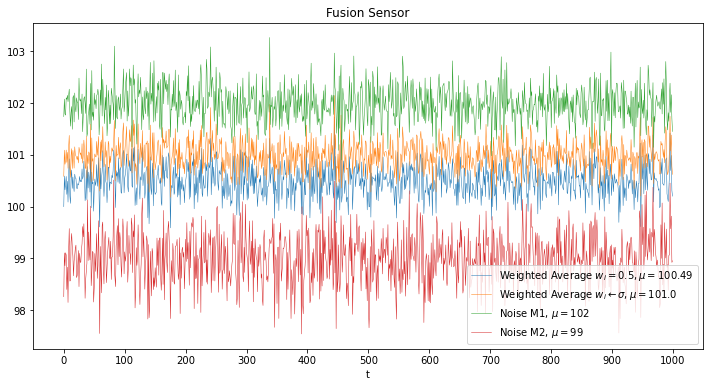

In [21]:
mean_m1 = np.mean(noise_measure_1)
mean_m2 = np.mean(noise_measure_2)

varianza_m1 = sum((noise_measure_1-mean_m1)**2)/count
varianza_m2 = sum((noise_measure_2-mean_m2)**2)/count

new_w = np.array([varianza_m2/(varianza_m1+varianza_m2),
                  varianza_m1/(varianza_m1+varianza_m2)])

new_mu = (new_w[0])*mean_m1+(new_w[1])*mean_m2

new_var = 1/((1/varianza_m1)+(1/varianza_m2))

x_p_var = np.zeros(count)
for i in range(count):
    arg = np.dot(new_w, data[i])
    x_p_var[i] = arg

plt.figure(figsize=(12, 6))
plt.plot(x_p,lw=0.5)
plt.plot(x_p_var,lw=0.5)
plt.plot(noise_measure_1,lw=0.5)
plt.plot(noise_measure_2,lw=0.5)
plt.title("Fusion Sensor")
plt.xticks(np.arange(0,1100,100))
plt.xlabel("t")
plt.legend(["Weighted Average $w_i=0.5, \mu = 100.49$",
           "Weighted Average $w_i \leftarrow \sigma,\mu =$"+str(np.round(new_mu)), 
           "Noise M1, $\mu = 102$", 
           "Noise M2, $\mu = 99$"])
plt.savefig("Graph_4_P2.png",dpi=300,bbox_inches='tight')
plt.show()


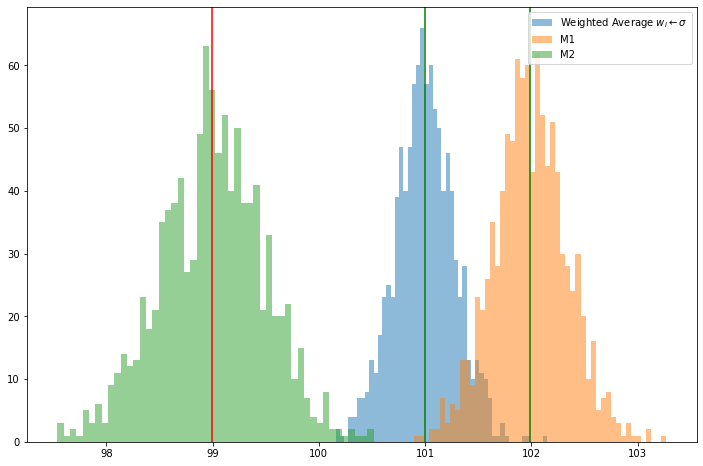

In [22]:
plt.figure(figsize=(12,8))

#axs[0].set_title("Histogram 1/2")
plt.axvline(x=np.mean(x_p_var), color='green')
plt.hist(x_p_var,bins=50, alpha=0.5, label="Weighted Average $w_i \leftarrow \sigma$")


#axs[1].set_title("Histogram of Noise Measure 1")
plt.axvline(x=np.mean(noise_measure_1), color='green')
plt.hist(noise_measure_1,bins=50, alpha=0.5, label="M1")


#axs[2].set_title("Histogram of Noise Measure 2")
plt.axvline(x=np.mean(noise_measure_2), color='red')
plt.hist(noise_measure_2,bins=50, alpha=0.5, label="M2")

plt.legend(loc='upper right')
plt.savefig("Graph_5_P2.png",dpi=300,bbox_inches='tight')
plt.show()

## Caso 3: Factor de Correción

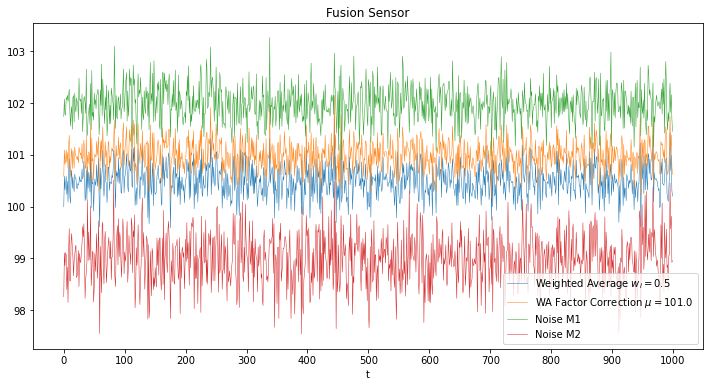

In [23]:
K=(varianza_m1/(varianza_m1+varianza_m2))
x_fc = noise_measure_1+K*(noise_measure_2-noise_measure_1)


plt.figure(figsize=(12, 6))
plt.plot(x_p,lw=0.5)
plt.plot(x_fc,lw=0.5)
plt.plot(noise_measure_1,lw=0.5)
plt.plot(noise_measure_2,lw=0.5)
plt.title("Fusion Sensor")
plt.xticks(np.arange(0,1100,100))
plt.xlabel("t")
plt.legend(["Weighted Average $w_i=0.5$",
            "WA Factor Correction $\mu =$"+str(np.round(np.mean(x_fc))), 
            "Noise M1", "Noise M2"])
plt.savefig("Graph_6_P2.png",dpi=300,bbox_inches='tight')
plt.show()